In [1]:
import os
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt

## 1. Examine the dataset. Are there any missing observations or columns where the data do not seem valid?

In [2]:
cash_outlet = pd.read_csv('training.csv')

In [3]:
cash_outlet.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [4]:
cash_outlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

In [5]:
cash_outlet.isnull().values.any()

False

## 2. Get basic descriptive statistics for the dataset.

In [6]:
cash_outlet.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
cash_outlet.rename(inplace=True, columns={
    'Q1':'age',
    'Q2':'gender',
    'Q3':'marital status',
    'Q4':'Highest level of education',
    'Q5':'property ownership',
    'Q6':'land ownership',
    'Q7':'personal mobile status',
    'Q8_1':'salaries or wages',
    'Q8_2':'money trading or selling',
    'Q8_3':'money providing a service',
    'Q8_4':'money casual work',
    'Q8_5':'money rental income',
    'Q8_6':'money interests',
    'Q8_7':'money pension',
    'Q8_8':'money social welfare',
    'Q8_9':'money financially dependant',
    'Q8_10':'money no income',
    'Q8_11':'other',
    'Q9':'salary and wages',
    'Q10':'selling things',
    'Q11':'providing a service',
    'Q12':'send money to another country',
    'Q13':'money last sent',
    'Q14':'received money from another country',
    'Q15':'last money received',
    'Q16':'mobile money purchases',
    'Q17':'mobile money bills',
    'Q18':'literacy in kwiswhahili',
    'Q19':'literacy in english'
    
})

In [8]:
cash_outlet.head()

,ID,age,gender,marital status,Highest level of education,property ownership,land ownership,personal mobile status,salaries or wages,money trading or selling,...,mobile money bills,literacy in kwiswhahili,literacy in english,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


## 3. Create appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

In [9]:
cash_outlet.mobile_money_classification.replace([0,1,2,3],['None','FS_only','MM_only','MM_FS'],inplace=True)

In [10]:
cash_outlet.groupby(by='mobile_money_classification').size()

mobile_money_classification
FS_only    1778
MM_FS      3126
MM_only     804
None       1386
dtype: int64

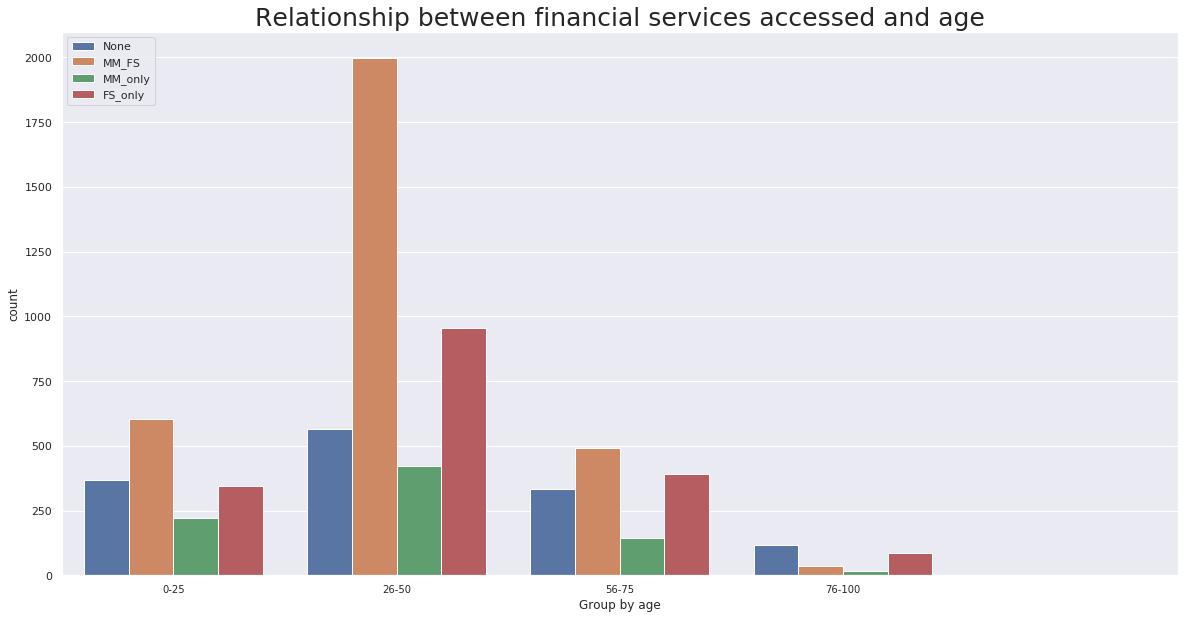

In [11]:
cash_outlet['Group by age'] = cash_outlet.age.apply(lambda x : int(x/25) * 10)

plt.figure(figsize=(20,10))
sns.countplot(x = 'Group by age', hue = 'mobile_money_classification',data = cash_outlet)
plt.legend(loc = 'best')
plt.title("Relationship between financial services accessed and age", fontsize=25)
plt.xticks(np.arange(4), ['0-25', '26-50', '56-75', '76-100'], fontsize=10)

plt.show()

In [12]:
cash_outlet.gender.replace([1,2],['Male','Female'],inplace=True)                    

In [13]:
cash_outlet.groupby(by='gender').size()

gender
Female    3972
Male      3122
dtype: int64

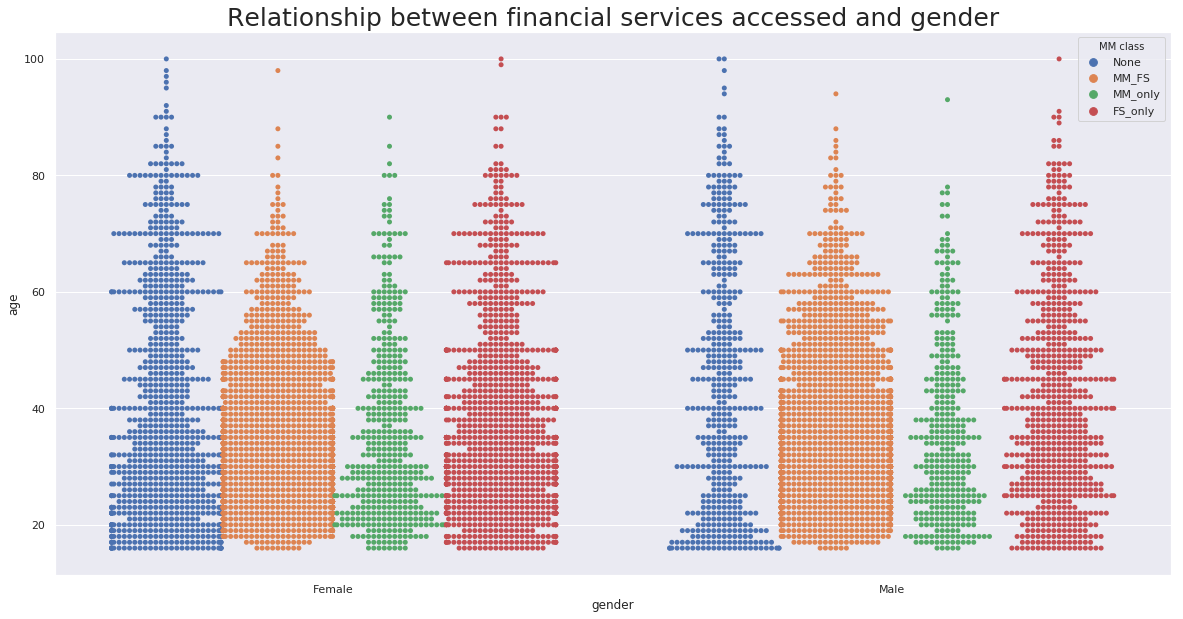

In [14]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='gender', y='age', data=cash_outlet, hue='mobile_money_classification', dodge=True)
plt.legend(title='MM class', loc = 'best')
plt.title("Relationship between financial services accessed and gender", fontsize=25)

plt.show()

In [15]:
cash_outlet['marital status'].replace([1,2,3,4],['Married','Divorced','Widowed','Never married'],inplace=True)

In [16]:
cash_outlet.groupby(by='marital status').size()

marital status
Divorced          687
Married          4548
Never married    1181
Widowed           678
dtype: int64

In [17]:
# cash_outlet['marital status']

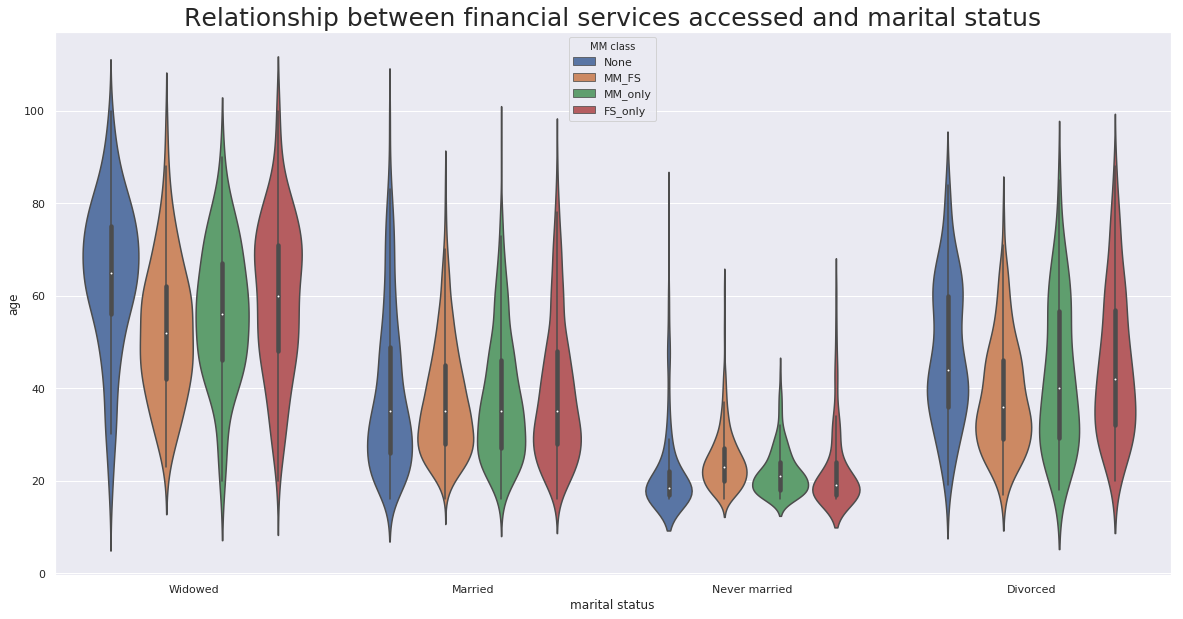

In [18]:
# div = cash_outlet['marital status'] == 'Divorced'
# marr = cash_outlet['marital status'] == 'Married'
# wid = cash_outlet['marital status'] == 'Widowed'
# nev = cash_outlet['marital status'] == 'Never married'

plt.figure(figsize=(20,10))
sns.violinplot(x='marital status', y='age', data=cash_outlet, hue='mobile_money_classification', dodge=True)
plt.legend(title='MM class', loc = 'upper center')
plt.title("Relationship between financial services accessed and marital status", fontsize=25)

plt.show()

In [19]:
cash_outlet['land ownership'].replace([1,2],['Yes', 'No'],inplace=True)

In [20]:
cash_outlet.groupby(by='land ownership').size()

land ownership
No     5963
Yes    1131
dtype: int64

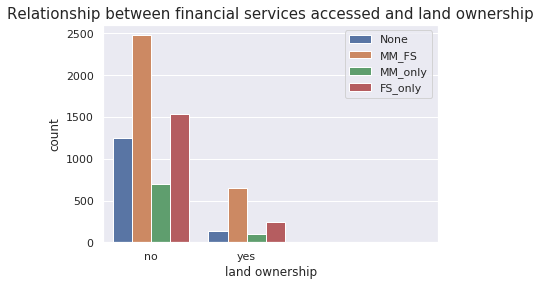

In [21]:
sns.countplot(x = 'land ownership', hue = 'mobile_money_classification',data = cash_outlet)
plt.legend(loc = 'best')
plt.title("Relationship between financial services accessed and land ownership", fontsize=15)
plt.xticks(np.arange(4), ['no', 'yes'])
plt.show()

In [24]:
income_type = cash_outlet[{'salaries or wages','money trading or selling',
                          'money providing a service',
                          'money casual work',
                          'money rental income',
                          'money interests',
                          'money pension',
                          'money social welfare',
                          'money financially dependant',
                          'money no income'}]

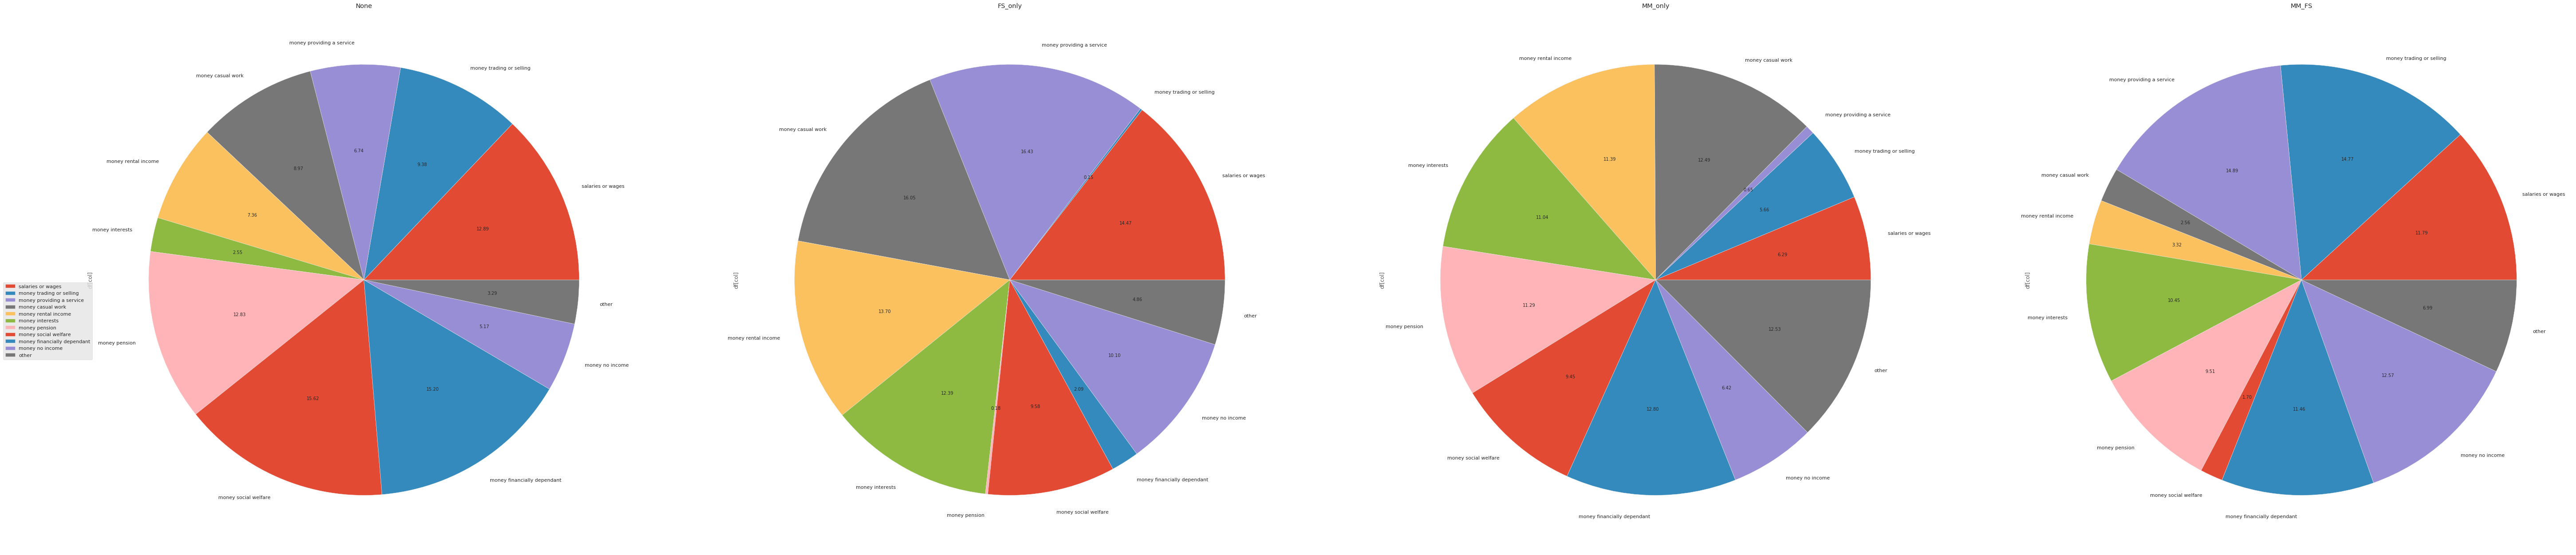

In [77]:
df = pd.DataFrame(3 * np.random.rand(11, 4), index=['salaries or wages','money trading or selling',
                          'money providing a service',
                          'money casual work',
                          'money rental income',
                          'money interests',
                          'money pension',
                          'money social welfare',
                          'money financially dependant',
                          'money no income', 'other'], 
                  columns=['None','FS_only','MM_only','MM_FS'])

labels = list(['salaries or wages','money trading or selling',
                          'money providing a service',
                          'money casual work',
                          'money rental income',
                          'money interests',
                          'money pension',
                          'money social welfare',
                          'money financially dependant',
                          'money no income', 'other'])

fig, axes = plt.subplots(1,4, figsize=(100,50))
for ax, col in zip(axes, df.columns):
    ax.pie(df[col], labels = labels, autopct='%.2f')
    ax.set(ylabel='df[col]', title=col, aspect='equal')

axes[0].legend(bbox_to_anchor=(0, 0.5))


plt.show()

## 4. Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.

In [27]:
cash_outlet['mobile money purchases'].replace([1,2,3,4,5],['No','Daily','Weekly','Monthly','Less_monthly'],inplace=True)

In [28]:
cash_outlet.groupby(by='mobile money purchases').size()

mobile money purchases
Daily             77
Less_monthly    1137
Monthly          543
No              5089
Weekly           248
dtype: int64

In [29]:
cash_outlet['mobile money bills'].replace([1,2,3,4,5],['Nill','Day','Week','Month','Less_month'],inplace=True)

In [30]:
cash_outlet.groupby(by='mobile money bills').size()

mobile money bills
-1            6025
Day             23
Less_month     169
Month          359
Nill           460
Week            58
dtype: int64

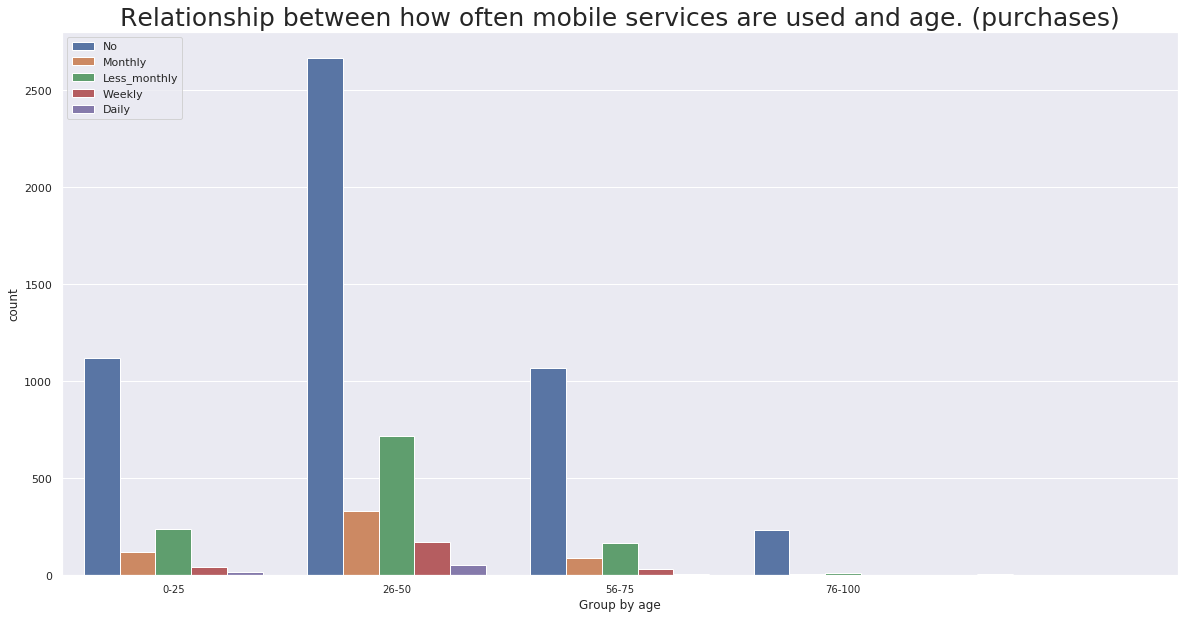

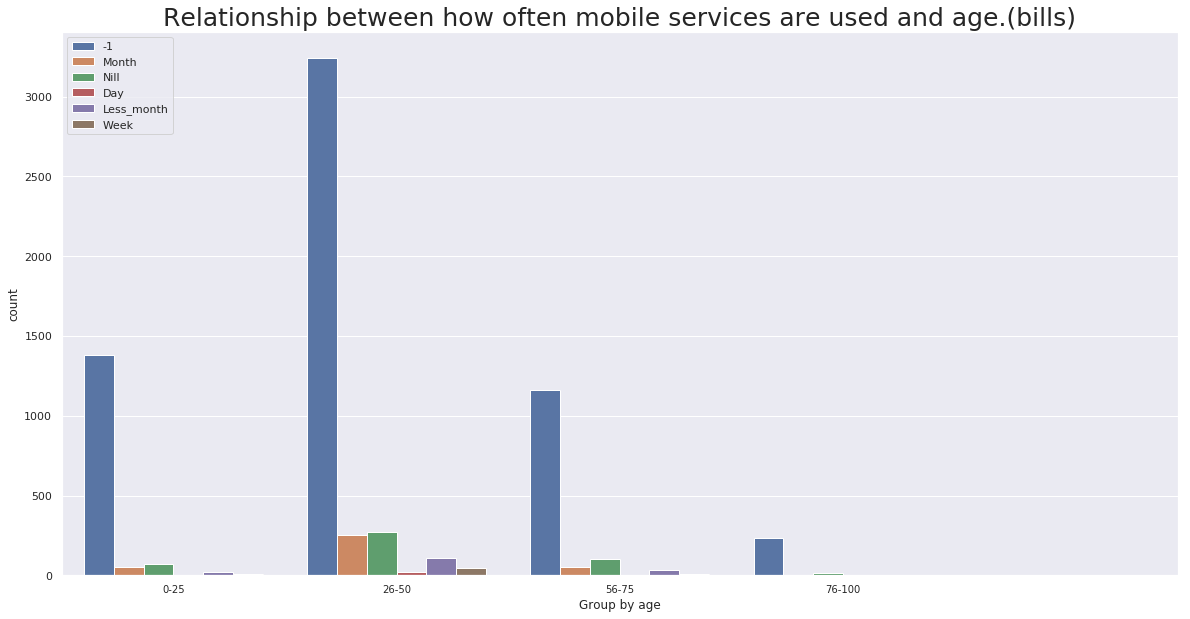

In [31]:
cash_outlet['Group by age'] = cash_outlet.age.apply(lambda x : int(x/25) * 10)

plt.figure(figsize=(20,10))
sns.countplot(x = 'Group by age', hue = 'mobile money purchases',data = cash_outlet)
plt.legend(loc = 'best')
plt.title("Relationship between how often mobile services are used and age. (purchases)", fontsize=25)
plt.xticks(np.arange(4), ['0-25', '26-50', '56-75', '76-100'], fontsize=10)

plt.show()

plt.figure(figsize=(20,10))
sns.countplot(x = 'Group by age', hue = 'mobile money bills',data = cash_outlet)
plt.legend(loc = 'best')
plt.title("Relationship between how often mobile services are used and age.(bills)", fontsize=25)
plt.xticks(np.arange(4), ['0-25', '26-50', '56-75', '76-100'], fontsize=10)

plt.show()


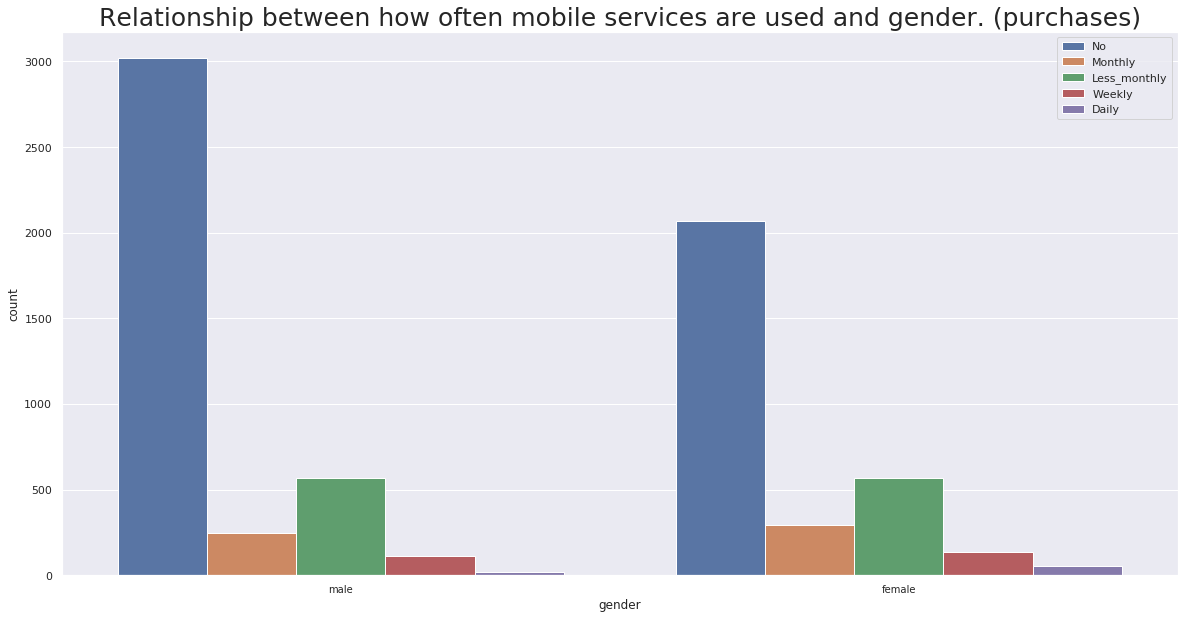

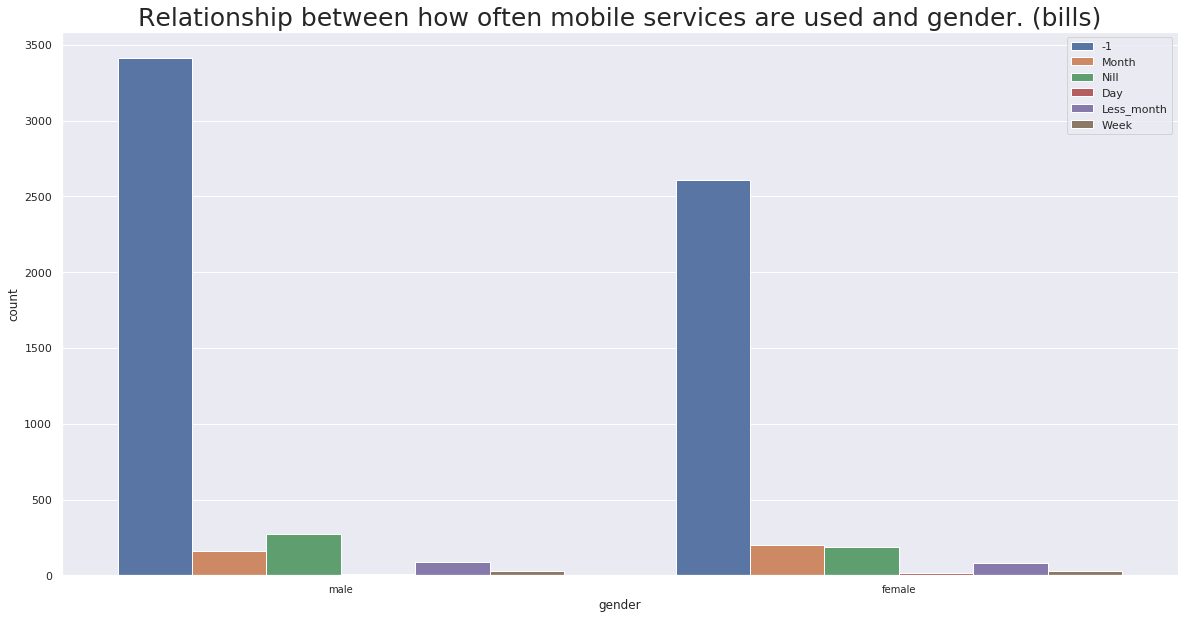

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'gender', hue = 'mobile money purchases',data=cash_outlet)
plt.legend(loc = 'best')
plt.title("Relationship between how often mobile services are used and gender. (purchases)", fontsize=25)
plt.xticks(np.arange(2), ['male', 'female'], fontsize=10)
plt.show()

plt.figure(figsize=(20,10))
sns.countplot(x='gender', hue='mobile money bills', data=cash_outlet)
plt.title("Relationship between how often mobile services are used and gender. (bills)", fontsize=25)
plt.legend(loc="upper right")
plt.xticks(np.arange(2), ['male', 'female'], fontsize=10)
plt.show()

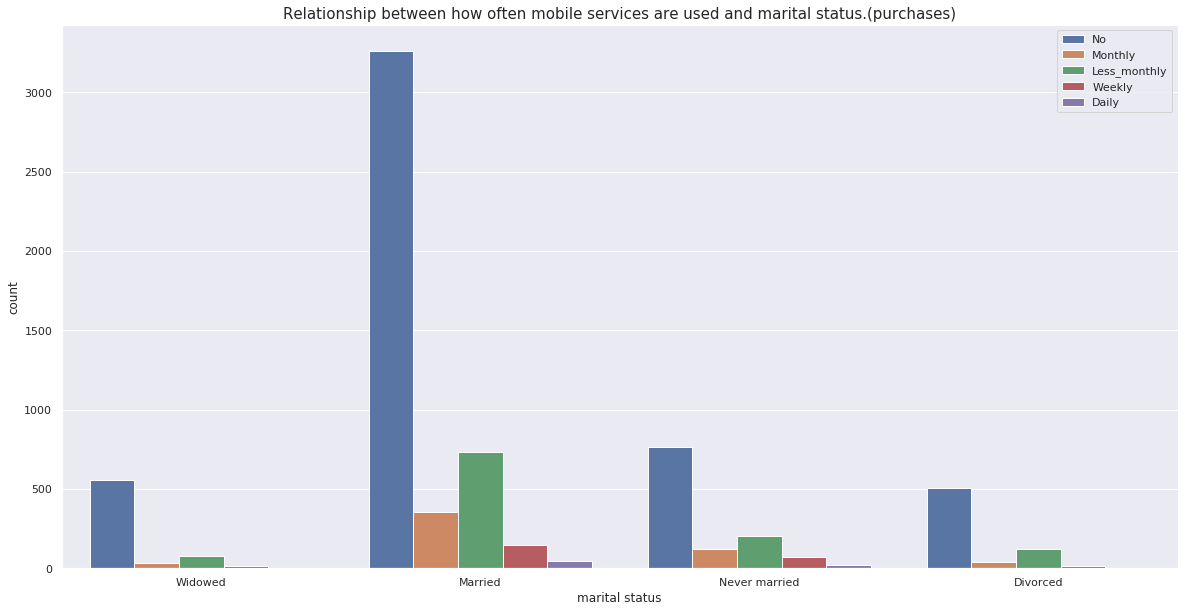

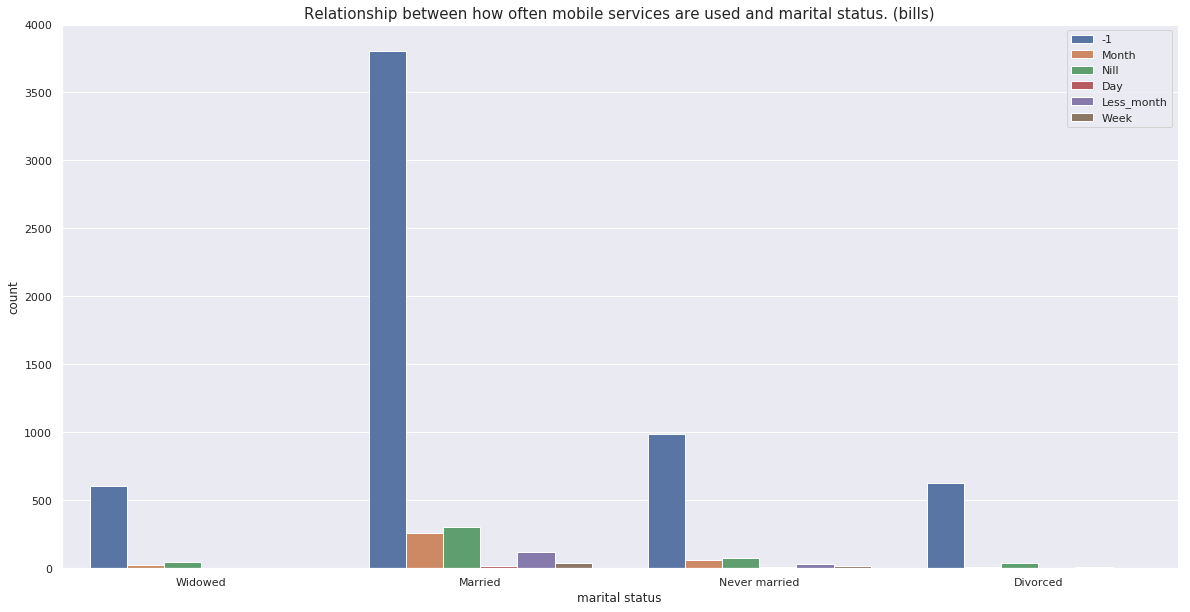

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(x='marital status', data=cash_outlet, hue='mobile money purchases')
plt.title("Relationship between how often mobile services are used and marital status.(purchases)", fontsize=15)
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(20,10))
sns.countplot(x='marital status', data=cash_outlet, hue='mobile money bills')
plt.title("Relationship between how often mobile services are used and marital status. (bills)", fontsize=15)
plt.legend(loc="upper right")
plt.show()

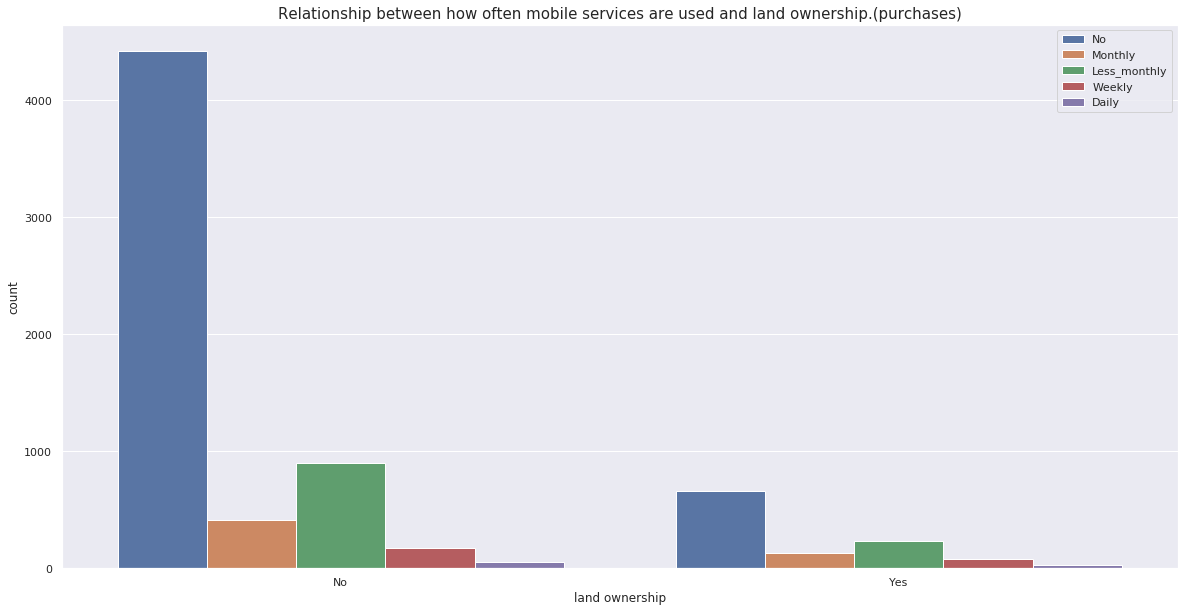

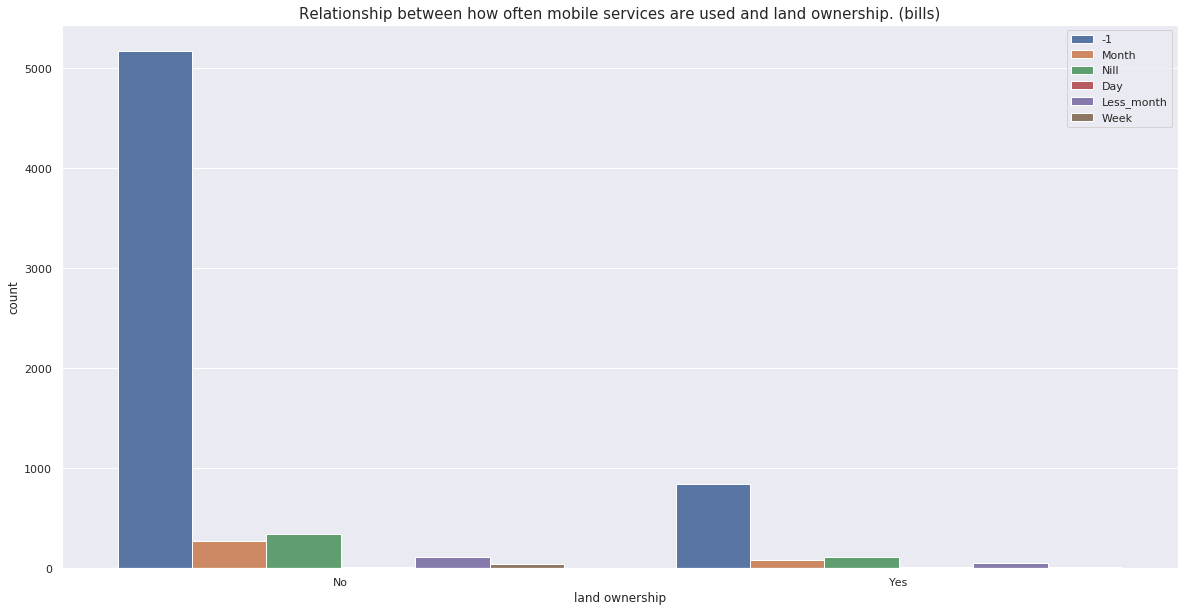

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x='land ownership', data=cash_outlet, hue='mobile money purchases')
plt.title("Relationship between how often mobile services are used and land ownership.(purchases)", fontsize=15)
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(20,10))
sns.countplot(x='land ownership', data=cash_outlet, hue='mobile money bills')
plt.title("Relationship between how often mobile services are used and land ownership. (bills)", fontsize=15)
plt.legend(loc="upper right")
plt.show()

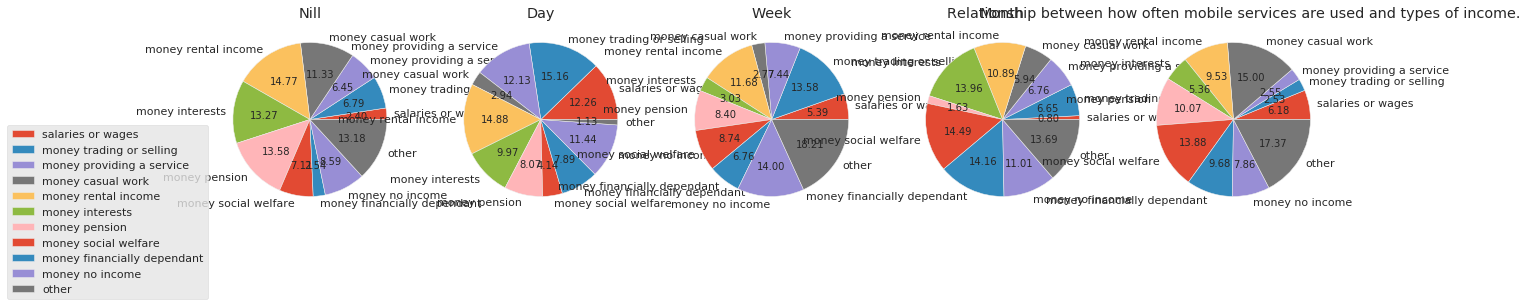

In [99]:
df = pd.DataFrame(3 * np.random.rand(11, 5), index=['salaries or wages','money trading or selling',
                          'money providing a service',
                          'money casual work',
                          'money rental income',
                          'money interests',
                          'money pension',
                          'money social welfare',
                          'money financially dependant',
                          'money no income', 'other'], 
                  columns=['Nill','Day','Week','Month','Less_month'])

labels = list(['salaries or wages','money trading or selling',
                          'money providing a service',
                          'money casual work',
                          'money rental income',
                          'money interests',
                          'money pension',
                          'money social welfare',
                          'money financially dependant',
                          'money no income', 'other'])

fig, axes = plt.subplots(1,5, figsize=(20,10))
for ax, col in zip(axes, df.columns):
    ax.pie(df[col], labels = labels, autopct='%.2f')
    ax.set(title=col, aspect='equal')
plt.title('Relationship between how often mobile services are used and types of income.')
axes[0].legend(bbox_to_anchor=(0, 0.5))


plt.show()

In [ ]:
import sys
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster


## 5. Create a map to visually explore geographic distribution of mobile services coverage with respect to type of income.

In [ ]:
income_type = cash_outlet['salaries or wages','money trading or selling',
                          'money providing a service',
                          'money casual work',
                          'money rental income',
                          'money interests',
                          'money pension',
                          'money social welfare',
                          'money financially dependant',
                          'money no income']

In [96]:
m= folium.Map(location=[-6.161184, 35.745426], tiles='OpenStreetMap', zoom_start=6)

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(df_income_produce.Latitude, df_income_produce.Longitude):
    folium.Marker(location = [lat, long]).add_to(marker_cluster)


NameError: name 'df_income_produce' is not defined

In [ ]:
df_income_piecejob= df_income_all[(df_income_all.income_type=='piece_job') & (df_income_all.mobile_money=='yes')]

In [ ]:
m= folium.Map(location=[-6.161184, 35.745426], tiles='OpenStreetMap', zoom_start=6)

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(df_income_piecejob.Latitude, df_income_piecejob.Longitude):
    folium.Marker(location = [lat, long]).add_to(marker_cluster)

m

In [ ]:
# Creating a map for tanzania.
lat = -6.3728253; 
lon = 34.8924826
income_type_map = folium.Map(location = [lat, lon], zoom_start = 5)
marker_cluster = MarkerCluster().add_to(income_type_map)

# add markers to map
for lat, lng, label in zip(mob_mon['Latitude'], mob_mon['Longitude'], 
                           mob_mon['income_type']):
    label = folium.Popup(str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3386cc',
        fill_opacity=0.7,
        parse_html=False).add_to(marker_cluster)  

income_type_map

In [94]:
#map to visually explore geographic distribution of mobile services coverage with respect to type of income.
!{sys.executable} -m pip install folium --user
import folium
from folium.plugins import MarkerCluster
maps = folium.Map(location=[-6.161184, 35.745426], tiles='OpenStreetMap', zoom_start=6)
marker_cluster = MarkerCluster().add_to(maps)
for lat, long in zip(cash_outlet.Latitude, cash_outlet.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
maps

/usr/bin/sh: 1: {sys.executable}: not found


## 6. What can you conclude about use of financial services in Tanzania? Which demographic and geographic factors are associated with mobile money use?